In [1]:
import pandas as pd
import re

# Sample iperf3 output
iperf_output = """
20240521082108 [  6][TX-C]   0.00-1.00   sec  2.98 MBytes  25.0 Mbits/sec            2317  
20240521082108 [  8][RX-C]   0.00-1.00   sec  2.96 MBytes  24.9 Mbits/sec  0.592 ms  8/2314 (0.35%)  
20240521082109 [  6][TX-C]   1.00-2.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082109 [  8][RX-C]   1.00-2.00   sec  2.98 MBytes  25.0 Mbits/sec  0.652 ms  0/2318 (0%)  
20240521082110 [  6][TX-C]   2.00-3.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082110 [  8][RX-C]   2.00-3.00   sec  2.94 MBytes  24.7 Mbits/sec  0.627 ms  0/2289 (0%)  
20240521082111 [  6][TX-C]   3.00-4.00   sec  2.98 MBytes  25.0 Mbits/sec            2319  
20240521082111 [  8][RX-C]   3.00-4.00   sec  3.02 MBytes  25.3 Mbits/sec  0.589 ms  0/2348 (0%)  
20240521082112 [  6][TX-C]   4.00-5.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082112 [  8][RX-C]   4.00-5.00   sec  2.97 MBytes  24.9 Mbits/sec  0.564 ms  0/2311 (0%)  
20240521082113 [  6][TX-C]   5.00-6.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082113 [  8][RX-C]   5.00-6.00   sec  2.98 MBytes  25.0 Mbits/sec  0.693 ms  0/2321 (0%)  
20240521082114 [  6][TX-C]   6.00-7.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082114 [  8][RX-C]   6.00-7.00   sec  2.99 MBytes  25.1 Mbits/sec  0.568 ms  0/2327 (0%)  
20240521082115 [  6][TX-C]   7.00-8.00   sec  2.98 MBytes  25.0 Mbits/sec            2319  
20240521082115 [  8][RX-C]   7.00-8.00   sec  2.97 MBytes  24.9 Mbits/sec  0.627 ms  0/2307 (0%)  
20240521082116 [  6][TX-C]   8.00-9.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082116 [  8][RX-C]   8.00-9.00   sec  2.98 MBytes  25.0 Mbits/sec  0.600 ms  0/2316 (0%)  
20240521082117 [  6][TX-C]   9.00-10.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082117 [  8][RX-C]   9.00-10.00  sec  2.98 MBytes  25.0 Mbits/sec  0.570 ms  0/2320 (0%)  
20240521082118 [  6][TX-C]  10.00-11.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082118 [  8][RX-C]  10.00-11.00  sec  2.98 MBytes  25.0 Mbits/sec  0.576 ms  0/2316 (0%)  
20240521082119 [  6][TX-C]  11.00-12.00  sec  2.98 MBytes  25.0 Mbits/sec            2319  
20240521082119 [  8][RX-C]  11.00-12.00  sec  2.98 MBytes  25.0 Mbits/sec  0.583 ms  0/2321 (0%)  
20240521082120 [  6][TX-C]  12.00-13.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082120 [  8][RX-C]  12.00-13.00  sec  2.98 MBytes  25.0 Mbits/sec  0.783 ms  0/2317 (0%)  
20240521082121 [  6][TX-C]  13.00-14.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082121 [  8][RX-C]  13.00-14.00  sec  2.97 MBytes  24.9 Mbits/sec  0.719 ms  0/2313 (0%)  
20240521082122 [  6][TX-C]  14.00-15.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082122 [  8][RX-C]  14.00-15.00  sec  2.99 MBytes  25.1 Mbits/sec  0.872 ms  0/2324 (0%)  
"""

# Regular expression pattern to extract relevant information
pattern = re.compile(r'(\d+)\s+\[\s*(\d+)]\[(\w+)-C]\s+(\d+\.\d+)-(\d+\.\d+)\s+sec\s+([\d\.]+) MBytes\s+([\d\.]+) Mbits/sec(?:\s+([\d\.]+) ms)?\s*(\d*)/?(\d*)\s*(?:\(([\d\.]+)%\))?')

# Extracted data
data = []
for match in re.finditer(pattern, iperf_output):
    timestamp, id, direction, start, end, transfer, bitrate, jitter, lost, total, loss_percent = match.groups()
    data.append([timestamp, id, direction, start, end, transfer, bitrate, jitter, lost, total, loss_percent])

# Create DataFrame
columns = ['Timestamp', 'ID', 'Direction', 'Start Time (sec)', 'End Time (sec)', 'Transfer (MBytes)', 'Bitrate (Mbits/sec)', 'Jitter (ms)', 'Lost', 'Total', 'Loss Percentage']
df = pd.DataFrame(data, columns=columns)


In [2]:
df

,Timestamp,ID,Direction,Start Time (sec),End Time (sec),Transfer (MBytes),Bitrate (Mbits/sec),Jitter (ms),Lost,Total,Loss Percentage
0,20240521082108,6,TX,0.00,1.00,2.98,25.0,None,2317,,None
1,20240521082108,8,RX,0.00,1.00,2.96,24.9,0.592,8,2314,0.35
2,20240521082109,6,TX,1.00,2.00,2.98,25.0,None,2318,,None
3,20240521082109,8,RX,1.00,2.00,2.98,25.0,0.652,0,2318,0
4,20240521082110,6,TX,2.00,3.00,2.98,25.0,None,2318,,None
5,20240521082110,8,RX,2.00,3.00,2.94,24.7,0.627,0,2289,0
6,20240521082111,6,TX,3.00,4.00,2.98,25.0,None,2319,,None
7,20240521082111,8,RX,3.00,4.00,3.02,25.3,0.589,0,2348,0
8,20240521082112,6,TX,4.00,5.00,2.98,25.0,None,2318,,None
9,20240521082112,8,RX,4.00,5.00,2.97,24.9,0.564,0,2311,0


In [12]:
int(nRTCIBinary, 2)

527765881225216

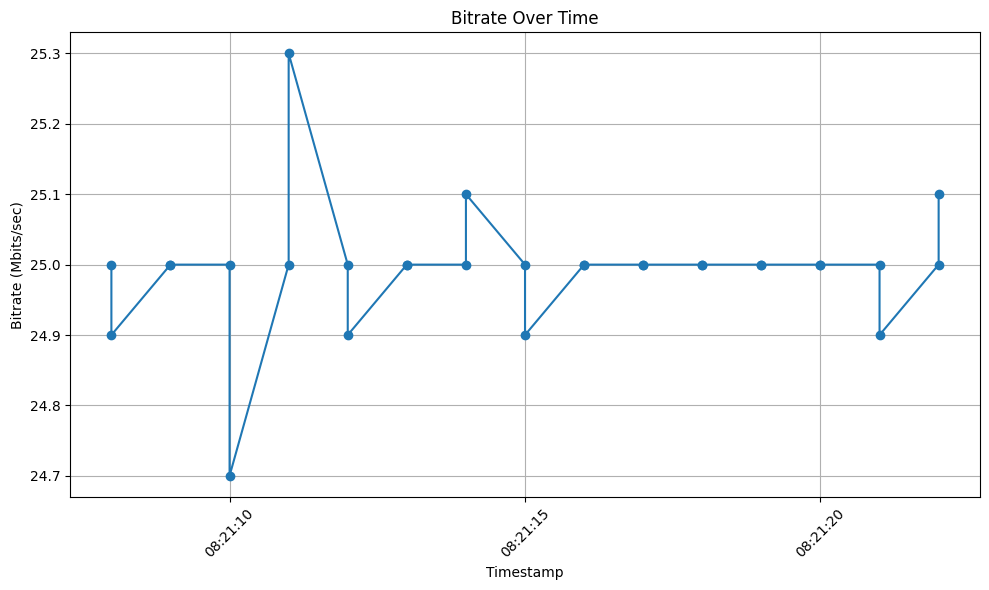

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime

# Sample iperf3 output
iperf_output = """
20240521082108 [  6][TX-C]   0.00-1.00   sec  2.98 MBytes  25.0 Mbits/sec            2317  
20240521082108 [  8][RX-C]   0.00-1.00   sec  2.96 MBytes  24.9 Mbits/sec  0.592 ms  8/2314 (0.35%)  
20240521082109 [  6][TX-C]   1.00-2.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082109 [  8][RX-C]   1.00-2.00   sec  2.98 MBytes  25.0 Mbits/sec  0.652 ms  0/2318 (0%)  
20240521082110 [  6][TX-C]   2.00-3.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082110 [  8][RX-C]   2.00-3.00   sec  2.94 MBytes  24.7 Mbits/sec  0.627 ms  0/2289 (0%)  
20240521082111 [  6][TX-C]   3.00-4.00   sec  2.98 MBytes  25.0 Mbits/sec            2319  
20240521082111 [  8][RX-C]   3.00-4.00   sec  3.02 MBytes  25.3 Mbits/sec  0.589 ms  0/2348 (0%)  
20240521082112 [  6][TX-C]   4.00-5.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082112 [  8][RX-C]   4.00-5.00   sec  2.97 MBytes  24.9 Mbits/sec  0.564 ms  0/2311 (0%)  
20240521082113 [  6][TX-C]   5.00-6.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082113 [  8][RX-C]   5.00-6.00   sec  2.98 MBytes  25.0 Mbits/sec  0.693 ms  0/2321 (0%)  
20240521082114 [  6][TX-C]   6.00-7.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082114 [  8][RX-C]   6.00-7.00   sec  2.99 MBytes  25.1 Mbits/sec  0.568 ms  0/2327 (0%)  
20240521082115 [  6][TX-C]   7.00-8.00   sec  2.98 MBytes  25.0 Mbits/sec            2319  
20240521082115 [  8][RX-C]   7.00-8.00   sec  2.97 MBytes  24.9 Mbits/sec  0.627 ms  0/2307 (0%)  
20240521082116 [  6][TX-C]   8.00-9.00   sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082116 [  8][RX-C]   8.00-9.00   sec  2.98 MBytes  25.0 Mbits/sec  0.600 ms  0/2316 (0%)  
20240521082117 [  6][TX-C]   9.00-10.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082117 [  8][RX-C]   9.00-10.00  sec  2.98 MBytes  25.0 Mbits/sec  0.570 ms  0/2320 (0%)  
20240521082118 [  6][TX-C]  10.00-11.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082118 [  8][RX-C]  10.00-11.00  sec  2.98 MBytes  25.0 Mbits/sec  0.576 ms  0/2316 (0%)  
20240521082119 [  6][TX-C]  11.00-12.00  sec  2.98 MBytes  25.0 Mbits/sec            2319  
20240521082119 [  8][RX-C]  11.00-12.00  sec  2.98 MBytes  25.0 Mbits/sec  0.583 ms  0/2321 (0%)  
20240521082120 [  6][TX-C]  12.00-13.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082120 [  8][RX-C]  12.00-13.00  sec  2.98 MBytes  25.0 Mbits/sec  0.783 ms  0/2317 (0%)  
20240521082121 [  6][TX-C]  13.00-14.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082121 [  8][RX-C]  13.00-14.00  sec  2.97 MBytes  24.9 Mbits/sec  0.719 ms  0/2313 (0%)  
20240521082122 [  6][TX-C]  14.00-15.00  sec  2.98 MBytes  25.0 Mbits/sec            2318  
20240521082122 [  8][RX-C]  14.00-15.00  sec  2.99 MBytes  25.1 Mbits/sec  0.872 ms  0/2324 (0%)  
"""

# Regular expression pattern to extract relevant information
pattern = re.compile(r'(\d+)\s+\[\s*(\d+)]\[(\w+)-C]\s+(\d+\.\d+)-(\d+\.\d+)\s+sec\s+([\d\.]+) MBytes\s+([\d\.]+) Mbits/sec(?:\s+([\d\.]+) ms)?\s*(\d*)/?(\d*)\s*(?:\(([\d\.]+)%\))?')

# Extracted data
data = []
for match in re.finditer(pattern, iperf_output):
    timestamp, id, direction, start, end, transfer, bitrate, jitter, lost, total, loss_percent = match.groups()
    data.append([timestamp, id, direction, start, end, transfer, bitrate, jitter, lost, total, loss_percent])

# Create DataFrame
columns = ['Timestamp', 'ID', 'Direction', 'Start Time (sec)', 'End Time (sec)', 'Transfer (MBytes)', 'Bitrate (Mbits/sec)', 'Jitter (ms)', 'Lost', 'Total', 'Loss Percentage']
df = pd.DataFrame(data, columns=columns)

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y%m%d%H%M%S')

# Convert Bitrate to float
df['Bitrate (Mbits/sec)'] = df['Bitrate (Mbits/sec)'].astype(float)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Bitrate (Mbits/sec)'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Bitrate (Mbits/sec)')
plt.title('Bitrate Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 110
483785413492736

### 120
527765881225216

### 130
571746348957696

### 24
105553390993408

### 32
140737765179392

def Reverse(str):
    stringlength=len(str)
    slicedString=str[stringlength::-1]
    return (slicedString)

def DecodePLMN(plmn):
    print("Decoded PLMN: " + str(plmn))
    mcc = Reverse(plmn[0:2]) + Reverse(plmn[2:4]).replace('f', '')
    print("Decoded MCC: " + mcc)
    mnc = Reverse(plmn[4:6])
    print("Decoded MNC: " + mnc)
    return mcc, mnc

def EncodePLMN(mcc, mnc):
    plmn = list('XXXXXX')
    plmn[0] = Reverse(mcc)[1]
    plmn[1] = Reverse(mcc)[2]
    plmn[2] = "f"
    plmn[3] = Reverse(mcc)[0]
    plmn[4] = Reverse(mnc)[0]
    plmn[5] = Reverse(mnc)[1]
    plmn_list = plmn
    plmn = ''
    for bits in plmn_list:
        plmn = plmn + bits
    print("Encoded PLMN: " + str(plmn))
    return plmn

DecodePLMN('05f539')
EncodePLMN('505', '93')


In [9]:
def Reverse(str):
    stringlength=len(str)
    slicedString=str[stringlength::-1]
    return (slicedString)

def DecodePLMN(plmn):
    print("Decoded PLMN: " + str(plmn))
    mcc = Reverse(plmn[0:2]) + Reverse(plmn[2:4]).replace('f', '')
    print("Decoded MCC: " + mcc)
    mnc = Reverse(plmn[4:6])
    print("Decoded MNC: " + mnc)
    return mcc, mnc

def EncodePLMN(mcc, mnc):
    plmn = list('XXXXXX')
    plmn[0] = Reverse(mcc)[1]
    plmn[1] = Reverse(mcc)[2]
    plmn[2] = "f"
    plmn[3] = Reverse(mcc)[0]
    plmn[4] = Reverse(mnc)[0]
    plmn[5] = Reverse(mnc)[1]
    plmn_list = plmn
    plmn = ''
    for bits in plmn_list:
        plmn = plmn + bits
    print("Encoded PLMN: " + str(plmn))
    return plmn

DecodePLMN('00f110')
EncodePLMN('001', '01')


Decoded PLMN: 00f110
Decoded MCC: 001
Decoded MNC: 01
Encoded PLMN: 00f110


'00f110'

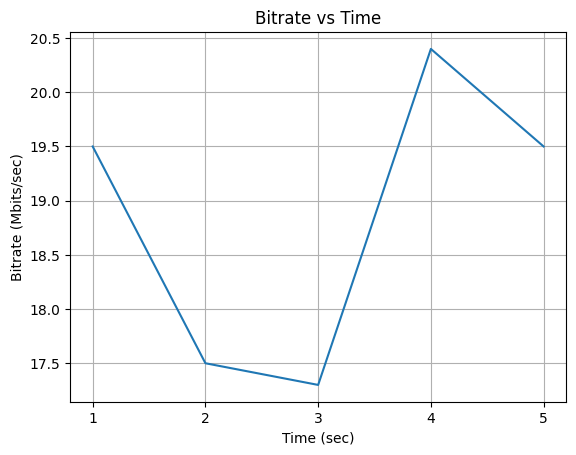

In [1]:
import re
import matplotlib.pyplot as plt

# 示例文本数据
text = """
0001 [  6] 1567.00-1568.00 sec  2.33 MBytes  19.5 Mbits/sec  0.532 ms  595/2406 (25%)
0002 [  6] 1568.00-1569.00 sec  2.08 MBytes  17.5 Mbits/sec  0.649 ms  557/2177 (26%)
0003 [  6] 1569.00-1570.00 sec  2.06 MBytes  17.3 Mbits/sec  0.502 ms  501/2102 (24%)
0004 [  6] 1570.00-1571.00 sec  2.43 MBytes  20.4 Mbits/sec  0.502 ms  644/2536 (25%)
0005 [  6] 1571.00-1572.00 sec  2.33 MBytes  19.5 Mbits/sec  0.567 ms  653/2462 (27%)
"""

# 从文本中提取时间和比特率
time_bitrate = []
pattern = r"(\d+) \[.*\] (\d+\.\d+)-(\d+\.\d+) sec.* (\d+\.\d+) Mbits\/sec"
matches = re.findall(pattern, text)
for match in matches:
    time = int(match[0])  # 获取列1中的时间并转换为整数
    bitrate = float(match[3])
    time_bitrate.append((time, bitrate))

# 将数据拆分为 x 和 y 值
x = [data[0] for data in time_bitrate]
y = [data[1] for data in time_bitrate]

# 绘制线性图
plt.plot(x, y)
plt.xlabel('Time (sec)')
plt.ylabel('Bitrate (Mbits/sec)')
plt.title('Bitrate vs Time')
plt.xticks(range(min(x), max(x) + 1, 1))  # 设置 x 轴刻度间隔为 1
plt.grid(True)
plt.show()


In [13]:
import serial.tools.list_ports as port_list
import re

ports = list(port_list.comports())
ets_ports = filter(lambda p: 'ETS' in str(p), ports)
com_ports = [re.search(r'COM\d+', str(port)).group() for port in ets_ports]

print(len(com_ports))
for p in com_ports:
    print (p)

32
COM4
COM7
COM8
COM11
COM13
COM16
COM18
COM19
COM21
COM23
COM25
COM27
COM29
COM31
COM33
COM35
COM37
COM39
COM41
COM43
COM45
COM47
COM49
COM51
COM53
COM56
COM58
COM61
COM63
COM66
COM68
COM71


In [52]:
import serial
import time

# Open the serial port. Replace 'COM71' with the appropriate COM port.
ser = serial.Serial('COM71', 921600, timeout=1)

# Give some time for the connection to establish
time.sleep(2)

# Function to write data to the serial port
def write_to_serial(data):
    ser.write(data.encode('utf-8'))
    print(f"Data written: {data}")

# Function to read multiple lines of data from the serial port
def read_from_serial():
    lines = []
    while ser.in_waiting > 0:
        line = ser.readline().decode('utf-8').rstrip()
        print(f"Data read: {line}")
        lines.append(line)
    return lines

try:
    # Example write
    write_to_serial("AT+EGMR=0,7")  # Ensure the command ends with newline characters

    # Give some time for the data to be sent and processed
    time.sleep(1)

    # Example read
    response_lines = read_from_serial()
    if response_lines:
        print("Received:")
        for line in response_lines:
            print(line)

finally:
    # Close the serial port
    ser.close()


Data written: AT+EGMR=0,7
Received:
AT+EGMR=0,7


In [6]:
import serial.tools.list_ports as port_list

# Get a list of available ports
ports = list(port_list.comports())

# Sort the list of ports based on their names
sorted_ports = sorted(ports, key=lambda p: str(p))

# Extract the first port
first_port = next(iter(sorted_ports), None)

# Print the first port
if first_port:
    print(first_port)


COM11 - MediaTek ETS Port (COM11)


In [67]:
import serial
import time

# Open the serial port. Replace 'COM3' with the appropriate COM port.
ser = serial.Serial('COM71', 921600, timeout=1)

# Give some time for the connection to establish
time.sleep(2)

# Function to write data to the serial port
def write_to_serial(data):
    ser.write(data.encode('utf-8'))
    print(f"Data written: {data}")

# Function to read data from the serial port
def read_from_serial():
    if ser.in_waiting > 0:
        data = ser.readline().decode('utf-8').rstrip()
        print(f"Data read: {data}")
        return data
    return None

try:
    # Clear any initial data in the input buffer
    ser.reset_input_buffer()

    # Example write
    write_to_serial("AT+EGMR=0,7\r")

    # Give some time for the data to be sent
    time.sleep(1)

    # Example read
    response = read_from_serial()
    if response:
        print(f"Received: {response}")
    else:
        print("No data received")

finally:
    # Close the serial port
    ser.close()


Data written: AT+EGMR=0,7
Data read: AT+EGMR=0,7
Received: AT+EGMR=0,7


In [70]:
import serial
ser = serial.Serial(port='COM4', baudrate=921600, bytesize=8, parity='N', stopbits=1, timeout=1, rtscts=False, dsrdtr=False)

In [71]:
cmd="AT+CFUN=1\r"
ser.reset_input_buffer()
ser.reset_output_buffer()
ser.write(cmd.encode())

10

In [72]:
cmd="AT+EGMR=0,7\r"
ser.reset_input_buffer()
ser.reset_output_buffer()
ser.write(cmd.encode())
msg=ser.read(64).decode('utf-8')
value = msg.split('"')[1]
print(value)

354076120024023


In [73]:
cmd="AT+EDMFAPP=6,4\r"
ser.reset_input_buffer()
ser.reset_output_buffer()
ser.write(cmd.encode())
msg=ser.read(128).decode('utf-8')
value = msg.split(',')

ser.close()

In [74]:
print(value)
print(msg)

['AT+EDMFAPP=6', '4\n\r\n+EDMFAPP: 6', '4', '11', '0', '1\r\n+EDMFAPP: 6', '4', '"NR PCC"', '79', '66', '720288', '11', '11', '1', '1', '1', '1', '10', '17', '4', '8', '21', '0', '0', '3', '4', '9', '11', '11\r\nOK\r\n']
AT+EDMFAPP=6,4

+EDMFAPP: 6,4,11,0,1
+EDMFAPP: 6,4,"NR PCC",79,66,720288,11,11,1,1,1,1,10,17,4,8,21,0,0,3,4,9,11,11
OK



In [1]:
print((msg.split('\n')[2]).strip().split(": "))

NameError: name 'msg' is not defined